In [1]:
pip install XGboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [5]:
dataset = pd.read_csv('/Users/mallelasathwik/Desktop/Train.csv')
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
dataset.shape

(10999, 12)

In [9]:
dataset.info

<bound method DataFrame.info of           ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   

In [11]:
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [13]:
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [15]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


([<matplotlib.patches.Wedge at 0x15beedc10>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.33%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.67%')])

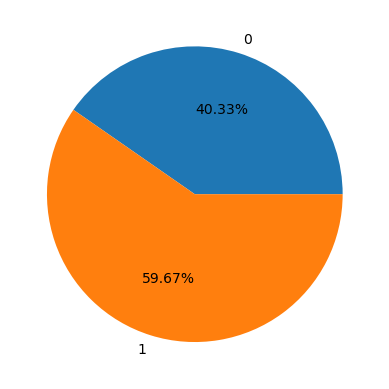

In [17]:
delay=pd.DataFrame(dataset.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(dataset)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%')

In [19]:
data_v1 = dataset[dataset['Reached.on.Time_Y.N']==0]

Text(0, 0.5, 'percentage')

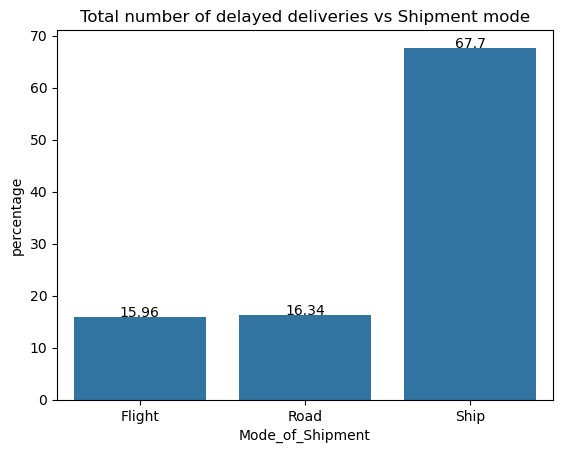

In [21]:
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Shipment mode')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

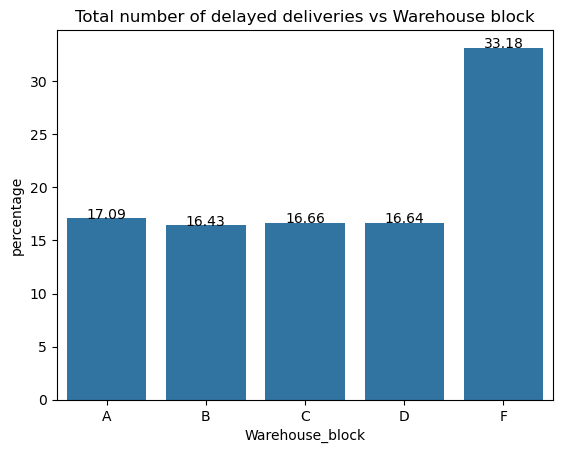

In [23]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x='Warehouse_block', y='ID', data=data_v3 )
for index, row in data_v3.iterrows():
   visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

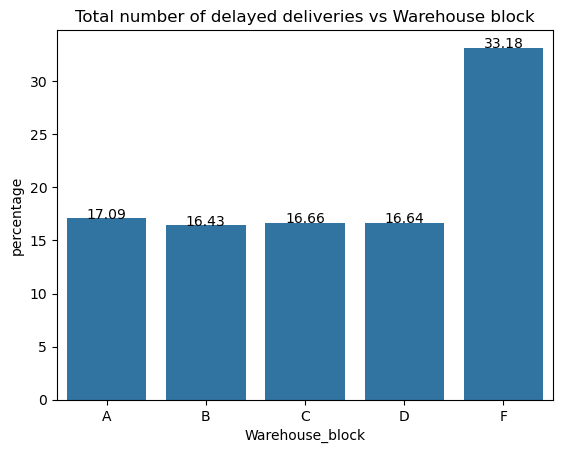

In [25]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x='Warehouse_block', y='ID', data=data_v3 )
for index, row in data_v3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

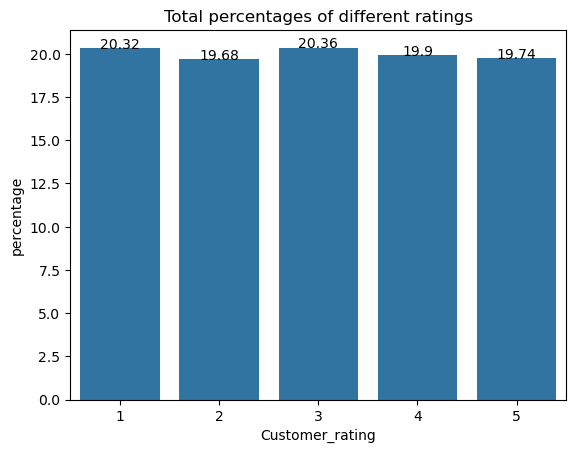

In [27]:
data_v4=pd.DataFrame((dataset.groupby(['Customer_rating'])['ID'].count())/len(dataset)*100)
data_v4=data_v4.reset_index()
visual=sns.barplot(x='Customer_rating', y='ID', data=data_v4 )
for index, row in data_v4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total percentages of different ratings')
plt.ylabel('percentage')

Text(0.5, 1.0, 'Product importance by Reached on Time or Not')

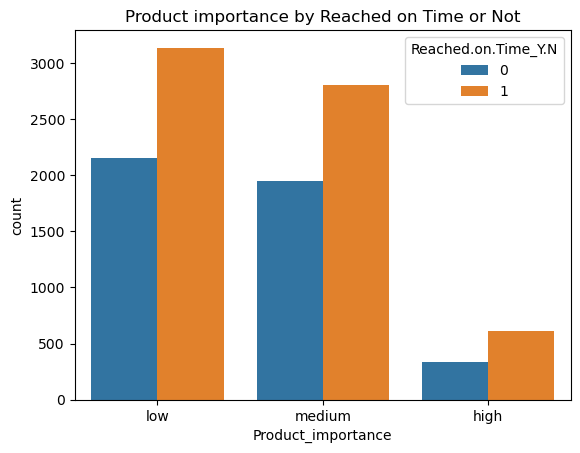

In [29]:
sns.countplot(x = "Product_importance", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Product importance by Reached on Time or Not")

Text(0.5, 1.0, 'Gender by Reached on Time or Not')

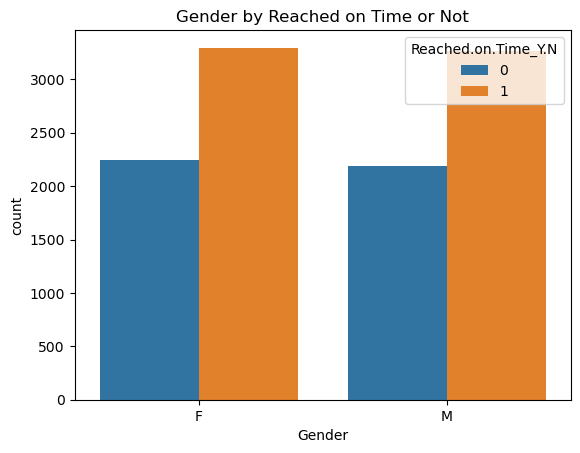

In [31]:
sns.countplot(x = "Gender", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Gender by Reached on Time or Not")

Text(0.5, 1.0, 'Warehouse block vs on Time or Not')

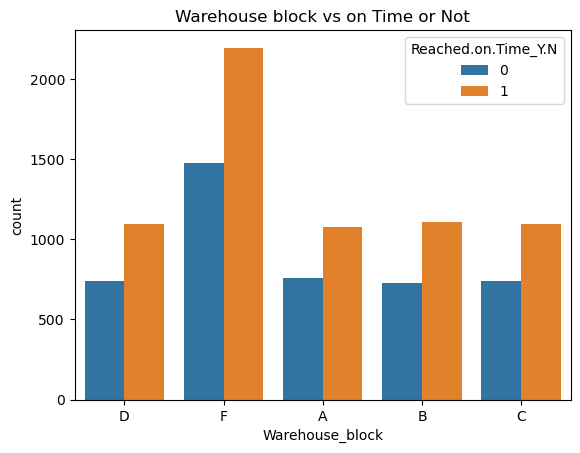

In [33]:
sns.countplot(x = "Warehouse_block", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Warehouse block vs on Time or Not")

Text(0.5, 1.0, 'Customer ratings by Gender')

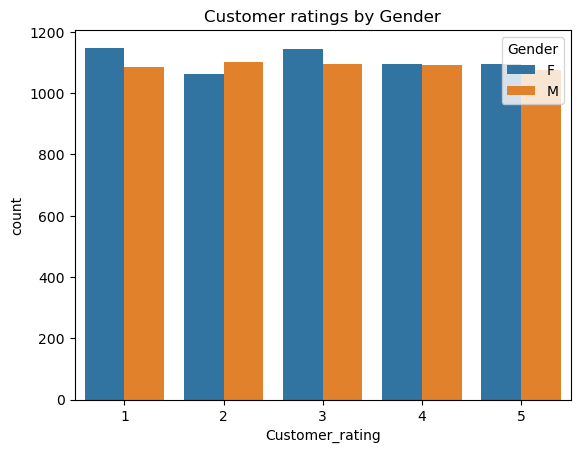

In [35]:
sns.countplot(x = "Customer_rating", data = dataset, hue="Gender")
plt.title("Customer ratings by Gender")

Text(0.5, 1.0, 'Amount spent by each Gender')

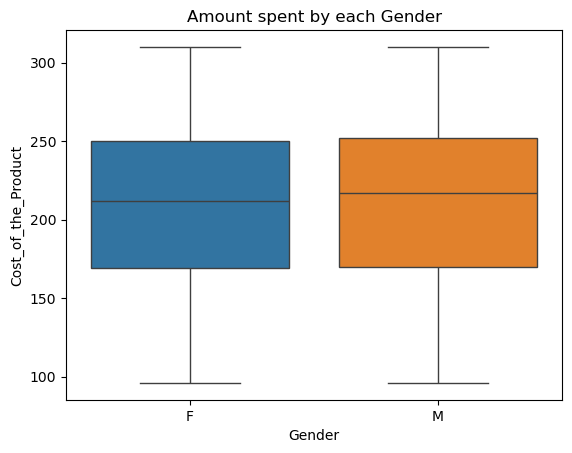

In [37]:
sns.boxplot(x='Gender',y='Cost_of_the_Product',data=dataset,hue='Gender')
plt.title("Amount spent by each Gender")

Text(0.5, 1.0, 'Average cost of products of different importance')

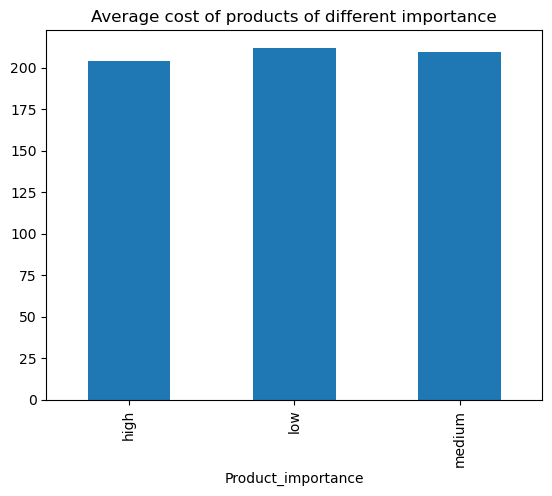

In [39]:
dataset.groupby(['Product_importance'])['Cost_of_the_Product'].mean().plot.bar()
plt.title("Average cost of products of different importance")

In [41]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


array([[<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Prior_purchases'}>],
       [<Axes: title={'center': 'Discount_offered'}>,
        <Axes: title={'center': 'Weight_in_gms'}>]], dtype=object)

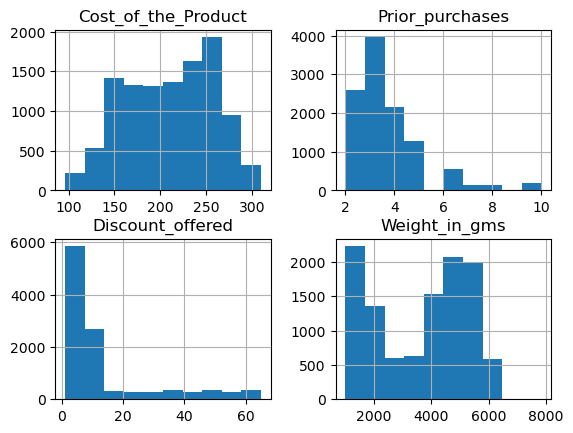

In [43]:
dataset[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']].hist()

In [45]:
data=dataset.drop(['ID'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [47]:
#Warehouse_block
crossTab = pd.crosstab(data['Warehouse_block'], data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [49]:
crossTab = pd.crosstab(data['Mode_of_Shipment'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [51]:
crossTab = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [53]:
crossTab = pd.crosstab(data['Gender'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


In [55]:
data.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)

In [57]:
X=data.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender','Product_importance'],axis=1)
y=data['Reached on Time']

In [59]:
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
   
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)


In [63]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test  =pd.DataFrame(X_test,columns=X.columns)
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0.2,1.0,0.383178,0.125,0.093750,0.457852
1,0.8,0.5,0.495327,0.250,0.031250,0.510592
2,0.0,1.0,0.845794,0.125,0.078125,0.004529
3,0.6,1.0,0.574766,0.000,0.046875,0.480351
4,0.8,0.5,0.934579,0.250,0.046875,0.094814


In [65]:
#baselinesvm
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.68       895
           1       0.87      0.51      0.65      1305

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.74      0.67      0.66      2200



In [87]:
#optimizedsvm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}


grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='f1_weighted')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
optimized_svm_model = svm.SVC(**best_params)
optimized_svm_model.fit(X_train, y_train)

# Predict and evaluate the optimized model
y_pred_optimized = optimized_svm_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.56      0.88      0.69       895
           1       0.86      0.53      0.66      1305

    accuracy                           0.67      2200
   macro avg       0.71      0.71      0.67      2200
weighted avg       0.74      0.67      0.67      2200

[[785 110]
 [607 698]]


In [69]:
#baselinerf
baseline_rf_model = RandomForestClassifier()
baseline_rf_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
y_pred_baseline = baseline_rf_model.predict(X_test)
print("Baseline Matrix:")
print(classification_report(y_test, y_pred_baseline))

Baseline Matrix:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       895
           1       0.75      0.66      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



In [88]:
#optimizedrf
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       895
           1       0.76      0.67      0.71      1305

    accuracy                           0.68      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.68      0.68      2200

[[613 282]
 [425 880]]


In [73]:
#baselinexgb
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.90      0.53      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.69      0.68      2200



In [89]:
#optimized xgb
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic'),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
optimized_xgb_model = xgb.XGBClassifier(objective='binary:logistic', **best_params)
optimized_xgb_model.fit(X_train, y_train)

y_pred_optimized = optimized_xgb_model.predict(X_test)
print("Optimized XGBoost Classifier:")
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

Optimized XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.57      0.96      0.72       895
           1       0.95      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.80      0.69      0.68      2200

[[863  32]
 [653 652]]


In [77]:
#baselineknn
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred))

K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.56      0.63      0.60       895
           1       0.73      0.66      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.65      2200



In [90]:
#optimizedknn
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
optimized_knn_model = KNeighborsClassifier(**best_params)
optimized_knn_model.fit(X_train, y_train)

y_pred_optimized = optimized_knn_model.predict(X_test)
print("Optimized K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

Optimized K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       895
           1       0.74      0.66      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200

[[593 302]
 [444 861]]


In [81]:
import pickle

In [83]:
pickle.dump(xgb_model, open('xgb_model_117.pk1','wb'))

In [85]:
pickle.dump(ms,open('bestmodel_117.pk1','wb'))